In [9]:
import pvlib
from pvlib.location import Location
import pandas as pd

# Define location and time
location = Location(latitude=60, longitude=-24)
times = pd.date_range('2024-05-28 00:00', '2024-10-01 23:00', freq='1h', tz='UTC')

# Get clear sky irradiance
cs = location.get_clearsky(times, model='ineichen')  # 'simplified_solis' also works

# Estimate PAR as ~45% of GHI (Global Horizontal Irradiance)
cs['PAR'] = cs['ghi'] * 0.45  # convert from W/m² to approximate PAR W/m²


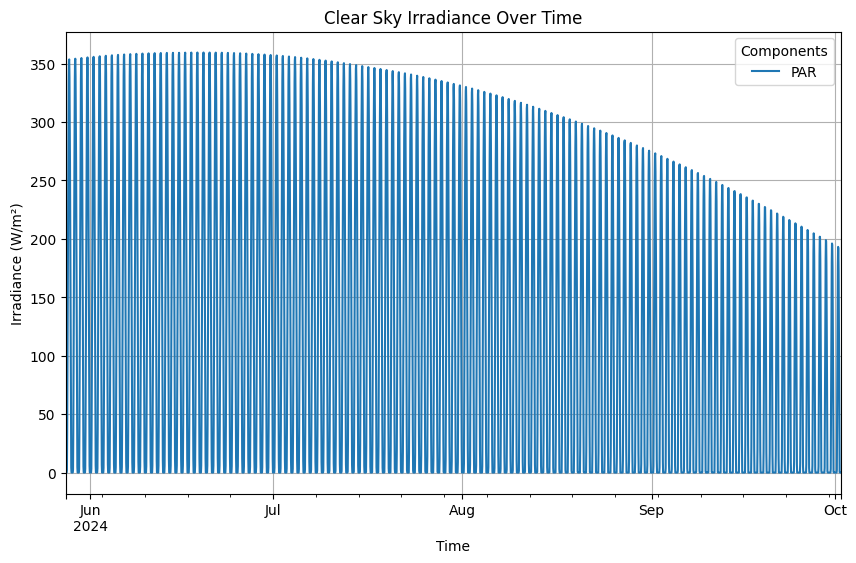

In [10]:
import matplotlib.pyplot as plt

# Plot the clear sky data for a week
cs.plot(y=['PAR'], figsize=(10, 6), title='Clear Sky Irradiance Over Time')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.legend(title='Components')
plt.grid()
plt.show()

In [11]:
# Save PAR and time to a CSV file
cs[['PAR']].to_csv('C:/Users/flapet/OneDrive - NOC/Documents/IDAPro/lib/db_building/data/PAR_and_time.csv', index_label='Time')